In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.linear_model import *
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset


In [5]:
data = pd.read_csv('Data/cardekho.csv')

data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


# Checking NaN values

In [6]:
def null_count():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values,
                'NaN count': data.isnull().sum().values,
                'NaN percentage': data.isnull().sum().values/data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,object,0,0.000000
2,new_price,object,10410,0.521178
3,year,int64,0,0.000000
4,seller_type,object,0,0.000000
5,km_driven,object,0,0.000000
6,owner_type,object,0,0.000000
7,fuel_type,object,0,0.000000
8,transmission_type,object,0,0.000000
9,mileage,object,160,0.008010


# Cleaning the dataset

1.Cleaning selling price column(gettting only the numerical value and multipling by suffix value lakhs)

In [7]:
for i in range(data.shape[0]):
    try:
        price = float(data['selling_price'][i].split(' ')[0])
        digit = data['selling_price'][i].split(' ')[1]
        if digit == 'Lakh*':
            price = price * 100000
            data['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            data['selling_price'][i] = price
    except:
        price = data['selling_price'][i][:-1]
        price = price.replace(',', '')
        data['selling_price'][i] = float(price)
        
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,215000.0,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


2.Cleaning kilometer driven, Mileage, Engine, Maxpower and Seats columns (getting only the numerical values from those strings)

In [8]:
# kilometer driven
data['km_driven'] = data['km_driven'].str.split(' ', n=1, expand=True)[0]
data['km_driven'] = data['km_driven'].str.replace(',','')
# Mileage
data['mileage'] = data['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]
# Engine
data['engine'] = data['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]
# Max Power
data['max_power'] = data['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]
# Seats 
data['seats'] = data['seats'].str.split('s', expand=True)[1]

data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000.0,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.7,796,46.3,5
1,Hyundai Grand i10 Asta,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.9,1197,82,5
2,Hyundai i20 Asta,215000.0,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.0,1197,80,5
3,Maruti Alto K10 2010-2014 VXI,226000.0,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998,67.1,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498,98.59,5


3.Changing the data types of the columns(data types of the feaures such as selling_price, km_driven, mileage, engine, max_power, seats to int/float)

In [9]:
cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

for col in cols:
    try:
        data[col] = data[col].astype(int)
    except:
        data[col] = data[col].astype(float)
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,225999,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0


4.Creating new feature Company(from full_name by getting the first word which is actually the cars company)

In [10]:
data['company'] = data['full_name'].str.split(' ', expand=True)[0]
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai Grand i10 Asta,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


5.Dropping Unwanted Coloumns(such as full_name,new_price,owner_type)

In [11]:
data.drop(columns=['new_price','owner_type','max_power','seats',
                  'seller_type'], axis=1, inplace=True)
data.head()

,full_name,selling_price,year,km_driven,fuel_type,transmission_type,mileage,engine,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,19.70,796.0,Maruti
1,Hyundai Grand i10 Asta,550000,2016,20000,Petrol,Manual,18.90,1197.0,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,17.00,1197.0,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,37000,Petrol,Manual,20.92,998.0,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,30000,Diesel,Manual,22.77,1498.0,Ford


# Data Analysis (Vizualization)

1.Basic statistic on numerical features

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,19974.0,739294.432612,910400.116520,25000.0,340000.00,520000.0,785000.00,39500000.0
year,19974.0,2014.526134,3.248791,1991.0,2013.00,2015.0,2017.00,2021.0
km_driven,19974.0,58238.894663,51727.595500,100.0,31114.00,52000.0,74000.00,3800000.0
mileage,19814.0,19.503637,4.298090,4.0,16.95,19.3,22.32,120.0
engine,19864.0,1477.805981,519.843056,72.0,1197.00,1248.0,1582.00,6752.0


2.Basic statistics on categorical features

In [13]:
data.describe(include='O')

,full_name,fuel_type,transmission_type,company
count,19974,19974,19974,19974
unique,3321,5,2,42
top,Maruti Swift Dzire VDI,Diesel,Manual,Maruti
freq,210,9815,16025,5648


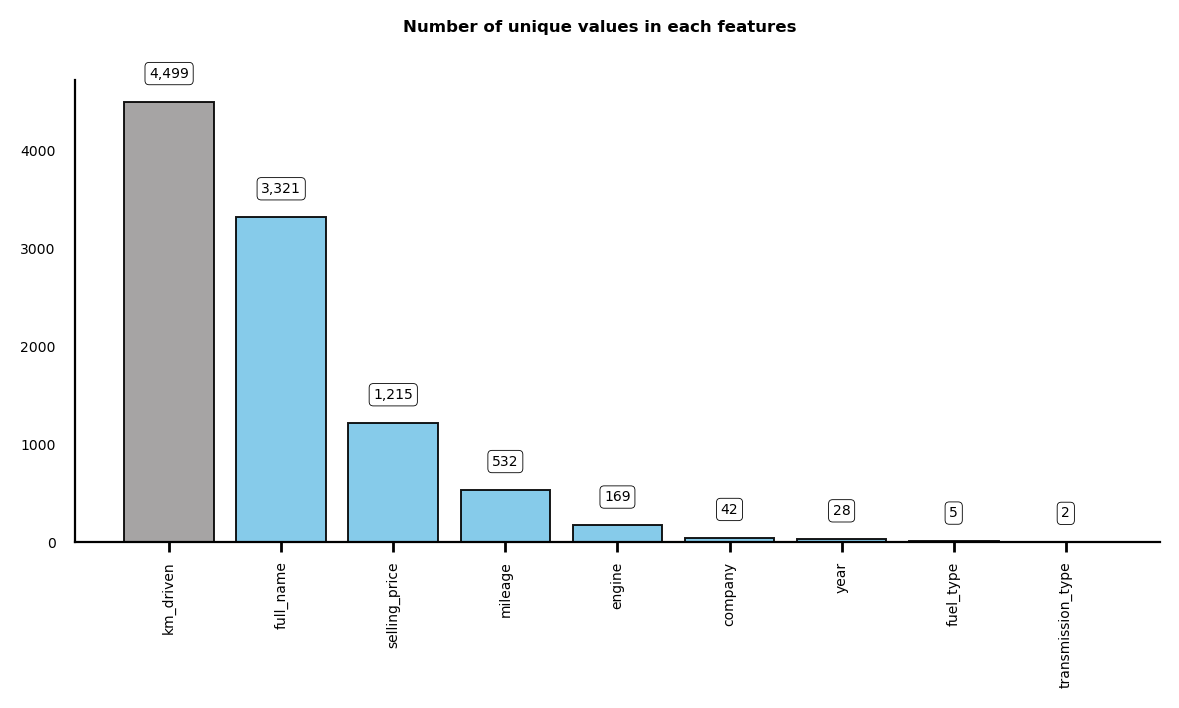

In [14]:
x = data.nunique().sort_values(ascending=False).index
y = data.nunique().sort_values(ascending=False).values

plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,1)
ax0 = fig.add_subplot(gs[0,0])
for i in ['top', 'right']:
    ax0.spines[i].set_visible(False)
    
colormap = ['#79c6e8' for i in range(data.shape[1])]
colormap[0] = '#9c9a9a'

ax0.bar(x=x, height=y, edgecolor='k', linewidth=0.7, color=colormap, alpha=0.9)
ax0.tick_params(axis='x',labelsize=5, rotation=90, width=1)
ax0.tick_params(axis='y', labelsize=5, left=False)
fig.suptitle(t='Number of unique values in each features', fontsize=6, weight='bold')

for p in ax0.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()+290
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()

# Feature engineering

1.Imputing missing values

In [15]:
null_count()


,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,int32,0,0.000000
2,year,int64,0,0.000000
3,km_driven,int32,0,0.000000
4,fuel_type,object,0,0.000000
5,transmission_type,object,0,0.000000
6,mileage,float64,160,0.008010
7,engine,float64,110,0.005507
8,company,object,0,0.000000


In [16]:
for i in ['mileage', 'engine']:
    company_name = data[data[i].isnull()]['company'].value_counts().index[0]
    if data[i].nunique()>10:
        values = data[data['company']==company_name][i].mean()
    else:
        values = data[data['company']==company_name][i].median()
        
    data[i].fillna(values, inplace=True)
    
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,int32,0,0.000000
2,year,int64,0,0.000000
3,km_driven,int32,0,0.000000
4,fuel_type,object,0,0.000000
5,transmission_type,object,0,0.000000
6,mileage,float64,0,0.000000
7,engine,float64,0,0.000000
8,company,object,0,0.000000


2. Removing outliers in the data

In [17]:
data = data[data['selling_price'] < 20000000]
data=data[data['selling_price']<6000000]
data = data[data['km_driven'] < 1000000]
data = data[data['mileage'] < 100]
data = data[data['engine'] < 6100]
data = data.reset_index(drop=True)

3.Appling discretization on company

In [18]:
company_name = data.company.value_counts().index[:15]
for i in range(data.shape[0]):
    if data['company'][i] in company_name:
         continue
    else:
        data['company'][i] = 'others'

In [19]:
#Checking Before Encoding Categorical Variables

data.head()

#renaming full_name to name
data.rename(columns = {'full_name':'name'}, inplace = True)

data.head()

,name,selling_price,year,km_driven,fuel_type,transmission_type,mileage,engine,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,19.70,796.0,Maruti
1,Hyundai Grand i10 Asta,550000,2016,20000,Petrol,Manual,18.90,1197.0,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,17.00,1197.0,Hyundai
3,Maruti Alto K10 2010-2014 VXI,225999,2012,37000,Petrol,Manual,20.92,998.0,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,2015,30000,Diesel,Manual,22.77,1498.0,Ford


# Final Adjustments Before Splitting the dataset for Model Builing

In [20]:
#Renaming price coloumn and km_driven
data = data.rename(columns={'selling_price': 'Price'})
data = data.rename(columns={'km_driven': 'kms_driven'})

#Taking only 1st 3 names of the car model
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

data.head()

,name,Price,year,kms_driven,fuel_type,transmission_type,mileage,engine,company
0,Maruti Alto Std,120000,2012,120000,Petrol,Manual,19.70,796.0,Maruti
1,Hyundai Grand i10,550000,2016,20000,Petrol,Manual,18.90,1197.0,Hyundai
2,Hyundai i20 Asta,215000,2010,60000,Petrol,Manual,17.00,1197.0,Hyundai
3,Maruti Alto K10,225999,2012,37000,Petrol,Manual,20.92,998.0,Maruti
4,Ford Ecosport 2015-2021,570000,2015,30000,Diesel,Manual,22.77,1498.0,Ford


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               19878 non-null  object 
 1   Price              19878 non-null  int32  
 2   year               19878 non-null  int64  
 3   kms_driven         19878 non-null  int32  
 4   fuel_type          19878 non-null  object 
 5   transmission_type  19878 non-null  object 
 6   mileage            19878 non-null  float64
 7   engine             19878 non-null  float64
 8   company            19878 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 1.2+ MB


In [22]:
#Changing mielage and engine coloumn to int
data['mileage']=data['mileage'].astype(int)
data['engine']=data['engine'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               19878 non-null  object
 1   Price              19878 non-null  int32 
 2   year               19878 non-null  int64 
 3   kms_driven         19878 non-null  int32 
 4   fuel_type          19878 non-null  object
 5   transmission_type  19878 non-null  object
 6   mileage            19878 non-null  int32 
 7   engine             19878 non-null  int32 
 8   company            19878 non-null  object
dtypes: int32(4), int64(1), object(4)
memory usage: 1.1+ MB


In [23]:
data.drop(['mileage', 'engine','transmission_type'], axis = 1, inplace = True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        19878 non-null  object
 1   Price       19878 non-null  int32 
 2   year        19878 non-null  int64 
 3   kms_driven  19878 non-null  int32 
 4   fuel_type   19878 non-null  object
 5   company     19878 non-null  object
dtypes: int32(2), int64(1), object(3)
memory usage: 776.6+ KB


#Saving Cleaned Dataset

In [25]:
data.to_csv('Cleaned.csv')